In [0]:
#Inicialización del entorno

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.6.tgz
!tar xf spark-2.4.5-bin-hadoop2.6.tgz
!pip install -q findspark

In [0]:
#Importe de bibliotecas necesarias

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.6"
import matplotlib.pyplot as plt
import pandas as pd
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

In [0]:
#Lectura de datos de google Drive

dfcolombia=spark.read.csv('drive/My Drive/data.csv',inferSchema=True,header=True)
mundoC=spark.read.csv('drive/My Drive/time_series_covid19_confirmed_global.csv',inferSchema=True,header=True)
mundoM=spark.read.csv('drive/My Drive/time_series_covid19_deaths_global.csv',inferSchema=True,header=True)
mundoR=spark.read.csv('drive/My Drive/time_series_covid19_recovered_global.csv',inferSchema=True,header=True)

In [4]:
#Exploración de los datos

print(dfcolombia.columns)
print((dfcolombia.count(),len(dfcolombia.columns)))
print(dfcolombia.printSchema())

print(mundoC.columns)
print((mundoC.count(),len(mundoC.columns)))
print(mundoC.printSchema())

['ID de caso', 'Fecha de notificación', 'Codigo DIVIPOLA', 'Ciudad de ubicación', 'Departamento o Distrito ', 'atención', 'Edad', 'Sexo', 'Tipo', 'Estado', 'País de procedencia', 'FIS', 'Fecha de muerte', 'Fecha diagnostico', 'Fecha recuperado', 'fecha reporte web']
(6508, 16)
root
 |-- ID de caso: string (nullable = true)
 |-- Fecha de notificación: string (nullable = true)
 |-- Codigo DIVIPOLA: string (nullable = true)
 |-- Ciudad de ubicación: string (nullable = true)
 |-- Departamento o Distrito : string (nullable = true)
 |-- atención: string (nullable = true)
 |-- Edad: string (nullable = true)
 |-- Sexo: string (nullable = true)
 |-- Tipo: string (nullable = true)
 |-- Estado: string (nullable = true)
 |-- País de procedencia: string (nullable = true)
 |-- FIS: string (nullable = true)
 |-- Fecha de muerte: string (nullable = true)
 |-- Fecha diagnostico: string (nullable = true)
 |-- Fecha recuperado: string (nullable = true)
 |-- fecha reporte web: string (nullable = true)

No

In [5]:
#Valor confirmados mundiales y colombianos

mundoC.select('4/30/20').groupby().sum().show()
dfcolombia.filter((dfcolombia['atención']!='Fallecido')&(dfcolombia['atención']!='Recuperado')).count()

+------------+
|sum(4/30/20)|
+------------+
|     3256846|
+------------+



4776

In [0]:
#Transformado a pandas para graficar

mundoC = mundoC.toPandas()
dfcolombia = dfcolombia.toPandas()

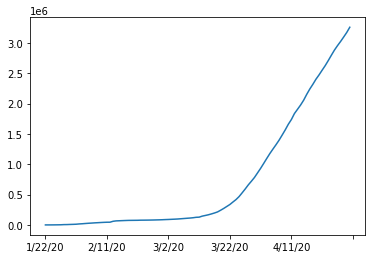

In [7]:
#Graficando confirmados mundo vs tiempo
mundoC = mundoC[mundoC.columns[4:]].sum()
my_plot = mundoC.plot(kind="line")
plt.show()

In [8]:
#Tratamiento de datos a dfcolombia para gráfico

dfcolombia = dfcolombia['Fecha de notificación'].str[:10]

dfcolombia = dfcolombia.value_counts()

dfcolombia = dfcolombia.sort_index(ascending=True)

acum = 0
for i in range(len(dfcolombia)):
  acum += dfcolombia[dfcolombia.index[i]]
  dfcolombia[dfcolombia.index[i]] = acum

dfcolombia

#date+noti       1
2020-03-02       2
2020-03-06       3
2020-03-07       4
2020-03-08       6
2020-03-09       9
2020-03-10      13
2020-03-11      21
2020-03-12      33
2020-03-13      46
2020-03-14      66
2020-03-15      85
2020-03-16     113
2020-03-17     155
2020-03-18     199
2020-03-19     269
2020-03-20     345
2020-03-21     422
2020-03-22     503
2020-03-23     596
2020-03-24     727
2020-03-25     884
2020-03-26    1037
2020-03-27    1195
2020-03-28    1358
2020-03-29    1495
2020-03-30    1686
2020-03-31    1874
2020-04-01    2067
2020-04-02    2218
2020-04-03    2402
2020-04-04    2556
2020-04-05    2652
2020-04-06    2776
2020-04-07    2918
2020-04-08    3040
2020-04-09    3172
2020-04-10    3288
2020-04-11    3524
2020-04-12    3672
2020-04-13    3848
2020-04-14    4059
2020-04-15    4203
2020-04-16    4437
2020-04-17    4581
2020-04-18    4759
2020-04-19    4949
2020-04-20    5126
2020-04-21    5329
2020-04-22    5568
2020-04-23    5736
2020-04-24    5888
2020-04-25  

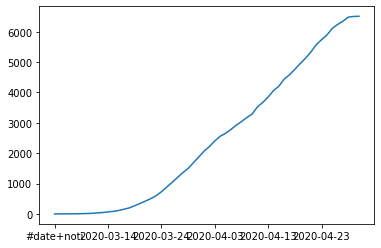

In [9]:
#Gráfica confirmados Colombia vs tiempo

my_plot = dfcolombia.plot(kind="line")
plt.show()

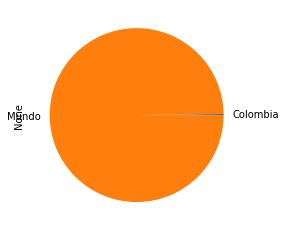

In [11]:
#Gráfica en porcentage mundo vs colombia

mvsc = pd.Series([dfcolombia[len(dfcolombia)-1], mundoC[len(mundoC)-1]],index=['Colombia', 'Mundo'])
plot = mvsc.plot(kind='pie')
plt.show()